In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
import sqlite3
conn = sqlite3.connect("/Users/ergangwang/Downloads/data_MIMIC/MIMIC.db")

In [9]:
pd.read_sql("SELECT * FROM sqlite_master where type='table'", conn)

,type,name,tbl_name,rootpage,sql
0,table,CHARTEVENTS,CHARTEVENTS,2,"CREATE TABLE CHARTEVENTS(\n ""ROW_ID"" TEXT,\n ..."
1,table,PROCEDUREEVENTS_MV,PROCEDUREEVENTS_MV,9120960,"CREATE TABLE ""PROCEDUREEVENTS_MV"" (\n""index"" I..."
2,table,CALLOUT,CALLOUT,9132354,"CREATE TABLE ""CALLOUT"" (\n""index"" INTEGER,\n ..."
3,table,D_CPT,D_CPT,9133903,"CREATE TABLE ""D_CPT"" (\n""index"" INTEGER,\n ""R..."
4,table,D_ITEMS,D_ITEMS,9133909,"CREATE TABLE ""D_ITEMS"" (\n""index"" INTEGER,\n ..."
5,table,CAREGIVERS,CAREGIVERS,9134171,"CREATE TABLE ""CAREGIVERS"" (\n""index"" INTEGER,\..."
6,table,MICROBIOLOGYEVENTS,MICROBIOLOGYEVENTS,9134246,"CREATE TABLE ""MICROBIOLOGYEVENTS"" (\n""index"" I..."
7,table,LABEVENTS,LABEVENTS,9153054,"CREATE TABLE ""LABEVENTS"" (\n""index"" INTEGER,\n..."
8,table,INPUTEVENTS_CV,INPUTEVENTS_CV,9708019,"CREATE TABLE ""INPUTEVENTS_CV"" (\n""index"" INTEG..."
9,table,ADMISSIONS,ADMISSIONS,10291267,"CREATE TABLE ""ADMISSIONS"" (\n""index"" INTEGER,\..."


In [17]:
#a way to export the .db files into csv file ==> possible use for tableau?
import csv

sql3_cursor = conn.cursor()
sql3_cursor.execute('SELECT * FROM ADMISSIONS')
with open('/Users/ergangwang/Downloads/data_MIMIC/ADMISSIONS.csv','w') as out_csv_file:
  csv_out = csv.writer(out_csv_file)
  # write header                        
  csv_out.writerow([d[0] for d in sql3_cursor.description])
  # write data                          
  for result in sql3_cursor:
    csv_out.writerow(result)

In [23]:
sql3_cursor = conn.cursor()
sql3_cursor.execute('SELECT * FROM PATIENTS')
with open('/Users/ergangwang/Downloads/data_MIMIC/PATIENTS.csv','w') as out_csv_file:
  csv_out = csv.writer(out_csv_file)
  # write header                        
  csv_out.writerow([d[0] for d in sql3_cursor.description])
  # write data                          
  for result in sql3_cursor:
    csv_out.writerow(result)

In [25]:
sql3_cursor = conn.cursor()
sql3_cursor.execute('SELECT * FROM DIAGNOSES_ICD')
with open('/Users/ergangwang/Downloads/data_MIMIC/DIAGNOSES_ICD.csv','w') as out_csv_file:
  csv_out = csv.writer(out_csv_file)
  # write header                        
  csv_out.writerow([d[0] for d in sql3_cursor.description])
  # write data                          
  for result in sql3_cursor:
    csv_out.writerow(result)

In [26]:
sql3_cursor = conn.cursor()
sql3_cursor.execute('SELECT * FROM D_ICD_DIAGNOSES')
with open('/Users/ergangwang/Downloads/data_MIMIC/D_ICD_DIAGNOSES.csv','w') as out_csv_file:
  csv_out = csv.writer(out_csv_file)
  # write header                        
  csv_out.writerow([d[0] for d in sql3_cursor.description])
  # write data                          
  for result in sql3_cursor:
    csv_out.writerow(result)

In [34]:
query = """
SELECT de.icustay_id
  , (strftime('%s',de.charttime)-strftime('%s',ie.intime))/60.0/60.0 as HOURS
  , di.label
  , de.value
  , de.valuenum
  , de.valueuom
FROM chartevents de
INNER join d_items di
ON de.itemid = di.itemid
INNER join icustays ie
ON de.icustay_id = ie.icustay_id
WHERE de.icustay_id = 252522
ORDER BY charttime;
"""

ce = pd.read_sql_query(query,conn)

In [35]:
ce.head()

,ICUSTAY_ID,HOURS,LABEL,VALUE,VALUENUM,VALUEUOM
0,252522,-0.012778,Marital Status,Widowed,4,
1,252522,-0.012778,Religion,Unknown,15,
2,252522,-0.012778,Patient Location,CC6D,,
3,252522,0.537222,Heart Rate,90,90,bpm
4,252522,0.537222,Non Invasive Blood Pressure systolic,104,104,mmHg


In [36]:
ce['LABEL']

0                                 Marital Status
1                                       Religion
2                               Patient Location
3                                     Heart Rate
4           Non Invasive Blood Pressure systolic
5          Non Invasive Blood Pressure diastolic
6               Non Invasive Blood Pressure mean
7                               Respiratory Rate
8                    O2 saturation pulseoxymetry
9                                     Heart Rate
10                       Heart rate Alarm - High
11                        Heart Rate Alarm - Low
12                              Respiratory Rate
13                   O2 saturation pulseoxymetry
14      Non-Invasive Blood Pressure Alarm - High
15       Non-Invasive Blood Pressure Alarm - Low
16                        Temperature Fahrenheit
17      O2 Saturation Pulseoxymetry Alarm - High
18       O2 Saturation Pulseoxymetry Alarm - Low
19                             Resp Alarm - High
20                  

In [43]:
ce.groupby(['LABEL']).size().sort_values(ascending=False)

LABEL
Respiratory Rate                                                116
Heart Rate                                                      116
Non Invasive Blood Pressure systolic                            115
Non Invasive Blood Pressure mean                                115
Non Invasive Blood Pressure diastolic                           115
Heart Rhythm                                                    115
Ectopy Type 1                                                   113
O2 saturation pulseoxymetry                                     113
Ectopy Frequency 1                                               95
Safety Measures_U_1                                              80
Assistance Device                                                46
Pain Management                                                  42
Position                                                         41
Activity Tolerance                                               41
Turn                                      

In [47]:
ce[ce.LABEL=='Resp Alarm - High']

,ICUSTAY_ID,HOURS,LABEL,VALUE,VALUENUM,VALUEUOM
19,252522,0.737222,Resp Alarm - High,30,30,insp/min
178,252522,3.553889,Resp Alarm - High,30,30,insp/min
662,252522,15.270556,Resp Alarm - High,30,30,insp/min
1187,252522,27.520556,Resp Alarm - High,35,35,insp/min
1804,252522,39.337222,Resp Alarm - High,30,30,insp/min
2124,252522,51.853889,Resp Alarm - High,35,35,insp/min
2773,252522,63.503889,Resp Alarm - High,30,30,insp/min
3119,252522,75.353889,Resp Alarm - High,40,40,insp/min
3739,252522,88.270556,Resp Alarm - High,30,30,insp/min
3792,252522,91.270556,Resp Alarm - High,40,40,insp/min


In [48]:
ce[ce.LABEL=='Resp Alarm - Low']

,ICUSTAY_ID,HOURS,LABEL,VALUE,VALUENUM,VALUEUOM
20,252522,0.737222,Resp Alarm - Low,8,8,insp/min
179,252522,3.553889,Resp Alarm - Low,8,8,insp/min
663,252522,15.270556,Resp Alarm - Low,8,8,insp/min
1188,252522,27.520556,Resp Alarm - Low,8,8,insp/min
1805,252522,39.337222,Resp Alarm - Low,8,8,insp/min
2125,252522,51.853889,Resp Alarm - Low,8,8,insp/min
2774,252522,63.503889,Resp Alarm - Low,8,8,insp/min
3120,252522,75.353889,Resp Alarm - Low,8,8,insp/min
3740,252522,88.270556,Resp Alarm - Low,8,8,insp/min
3793,252522,91.270556,Resp Alarm - Low,8,8,insp/min


In [38]:
ce[ce.LABEL=='Heart Rate']

,ICUSTAY_ID,HOURS,LABEL,VALUE,VALUENUM,VALUEUOM
3,252522,0.537222,Heart Rate,90,90,bpm
9,252522,0.737222,Heart Rate,86,86,bpm
141,252522,1.270556,Heart Rate,94,94,bpm
153,252522,2.270556,Heart Rate,91,91,bpm
162,252522,3.270556,Heart Rate,95,95,bpm
278,252522,4.270556,Heart Rate,90,90,bpm
289,252522,5.270556,Heart Rate,93,93,bpm
317,252522,6.270556,Heart Rate,97,97,bpm
326,252522,7.270556,Heart Rate,94,94,bpm
454,252522,8.270556,Heart Rate,96,96,bpm


Text(0.5,1,'Heart rate over time from admission to the intensive care unit')

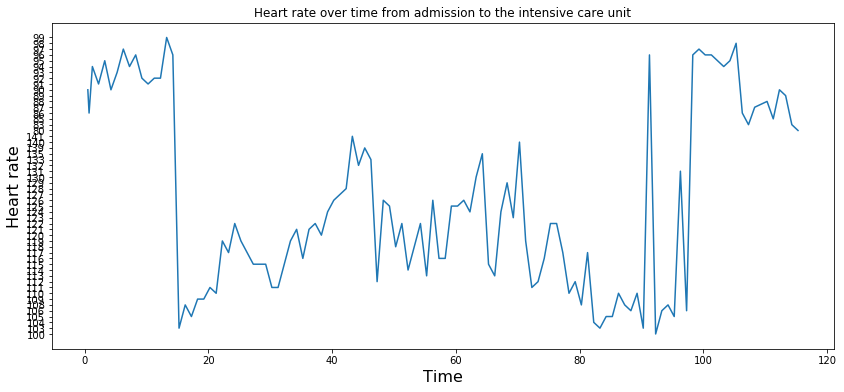

In [39]:
# Set x equal to the times
x_hr = ce.HOURS[ce.LABEL=='Heart Rate']

# Set y equal to the heart rates
y_hr = ce.VALUENUM[ce.LABEL=='Heart Rate']

# Plot time against heart rate
plt.figure(figsize=(14, 6))
plt.plot(x_hr,y_hr)


plt.xlabel('Time',fontsize=16)
plt.ylabel('Heart rate',fontsize=16)
plt.title('Heart rate over time from admission to the intensive care unit')

Text(0.5,1,'Respiratory Rate over time from admission to the intensive care unit')

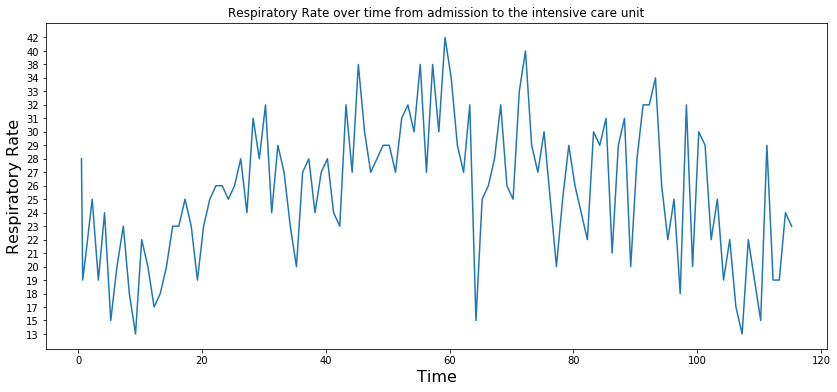

In [44]:
# Set x equal to the times
x_hr = ce.HOURS[ce.LABEL=='Respiratory Rate']

# Set y equal to the heart rates
y_hr = ce.VALUENUM[ce.LABEL=='Respiratory Rate']

# Plot time against heart rate
plt.figure(figsize=(14, 6))
plt.plot(x_hr,y_hr)


plt.xlabel('Time',fontsize=16)
plt.ylabel('Respiratory Rate',fontsize=16)
plt.title('Respiratory Rate over time from admission to the intensive care unit')

(array([0.]), array([55.]))

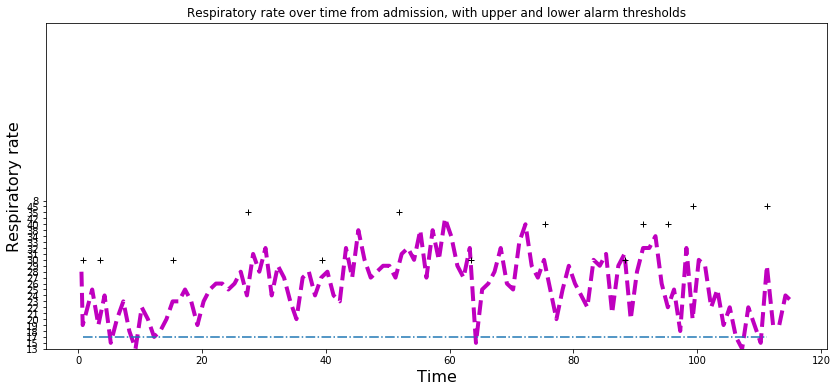

In [54]:
plt.figure(figsize=(14, 6))

plt.plot(ce.HOURS[ce.LABEL=='Respiratory Rate'], 
         ce.VALUENUM[ce.LABEL=='Respiratory Rate'],
         'm--', markersize=10, linewidth=4)

plt.plot(ce.HOURS[ce.LABEL=='Resp Alarm - High'], 
         ce.VALUENUM[ce.LABEL=='Resp Alarm - High'],
          'k+')

plt.plot(ce.HOURS[ce.LABEL=='Resp Alarm - Low'], 
         ce.VALUENUM[ce.LABEL=='Resp Alarm - Low'],
         '-.')

plt.xlabel('Time',fontsize=16)
plt.ylabel('Respiratory rate',fontsize=16)
plt.title('Respiratory rate over time from admission, with upper and lower alarm thresholds')
plt.ylim(0,55)

In [55]:
ce[ce.LABEL=='GCS - Eye Opening'].head()

,ICUSTAY_ID,HOURS,LABEL,VALUE,VALUENUM,VALUEUOM
36,252522,0.770556,GCS - Eye Opening,Spontaneously,4,
188,252522,3.587222,GCS - Eye Opening,Spontaneously,4,
340,252522,7.670556,GCS - Eye Opening,To Speech,3,
533,252522,11.570556,GCS - Eye Opening,To Speech,3,
676,252522,15.270556,GCS - Eye Opening,Spontaneously,4,


(array([10.]), array([165.]))

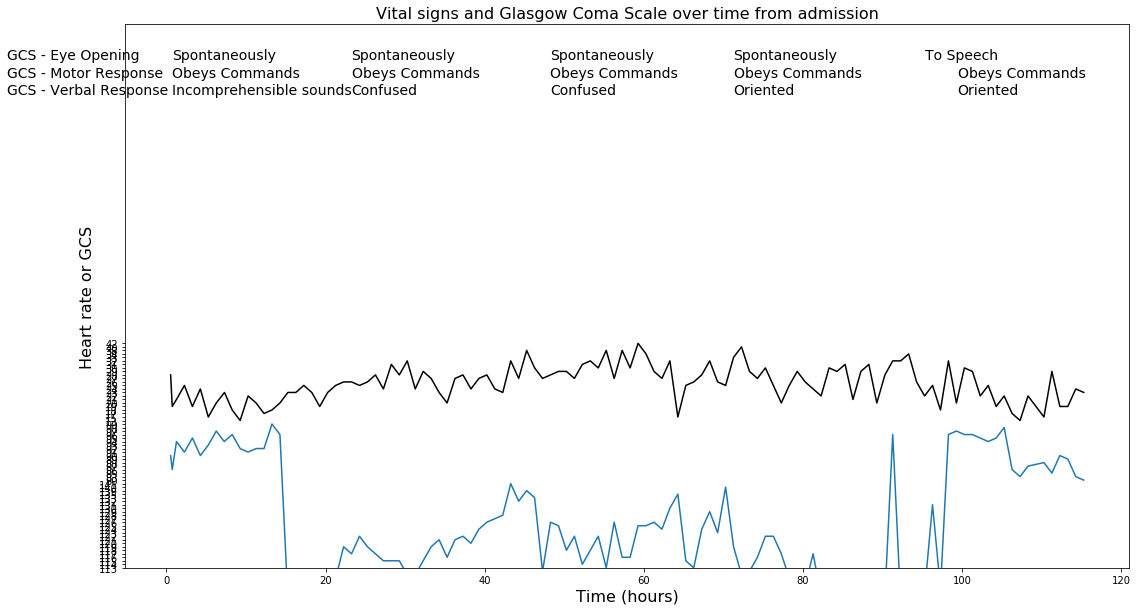

In [56]:
# Prepare the size of the figure
plt.figure(figsize=(18, 10))

# Set x equal to the times
x_hr = ce.HOURS[ce.LABEL=='Heart Rate']

# Set y equal to the heart rates
y_hr = ce.VALUENUM[ce.LABEL=='Heart Rate']


plt.plot(x_hr,y_hr)

plt.plot(ce.HOURS[ce.LABEL=='Respiratory Rate'], 
         ce.VALUENUM[ce.LABEL=='Respiratory Rate'],
         'k', markersize=6)

# Add a text label to the y-axis
plt.text(-20,155,'GCS - Eye Opening',fontsize=14)
plt.text(-20,150,'GCS - Motor Response',fontsize=14)
plt.text(-20,145,'GCS - Verbal Response',fontsize=14)   

# Iterate over list of GCS labels, plotting around 1 in 10 to avoid overlap
for i, txt in enumerate(ce.VALUE[ce.LABEL=='GCS - Eye Opening'].values):
    if np.mod(i,6)==0 and i < 65:
        plt.annotate(txt, (ce.HOURS[ce.LABEL=='GCS - Eye Opening'].values[i],155),fontsize=14)
        
for i, txt in enumerate(ce.VALUE[ce.LABEL=='GCS - Motor Response'].values):
    if np.mod(i,6)==0 and i < 65:
        plt.annotate(txt, (ce.HOURS[ce.LABEL=='GCS - Motor Response'].values[i],150),fontsize=14)

for i, txt in enumerate(ce.VALUE[ce.LABEL=='GCS - Verbal Response'].values):
    if np.mod(i,6)==0 and i < 65:
        plt.annotate(txt, (ce.HOURS[ce.LABEL=='GCS - Verbal Response'].values[i],145),fontsize=14)

plt.title('Vital signs and Glasgow Coma Scale over time from admission',fontsize=16)

plt.xlabel('Time (hours)',fontsize=16)
plt.ylabel('Heart rate or GCS',fontsize=16)
plt.ylim(10,165)


In [57]:
# OPTION 1: load outputs from the patient
query = """
select de.icustay_id
  , (strftime('%s',de.charttime)-strftime('%s',ie.intime))/60.0/60.0 as HOURS
  , di.label
  , de.value
  , de.valueuom
from outputevents de 
inner join icustays ie
  on de.icustay_id = ie.icustay_id
inner join d_items di
  on de.itemid = di.itemid
where de.subject_id = 40080
order by charttime;
"""

oe = pd.read_sql_query(query,conn)

In [60]:
oe.head()

,ICUSTAY_ID,HOURS,LABEL,VALUE,VALUEUOM
0,252522.0,0.753889,Pre-Admission,60.0,mL
1,252522.0,3.570556,Foley,80.0,mL
2,252522.0,4.270556,Foley,60.0,mL
3,252522.0,5.270556,Foley,60.0,mL
4,252522.0,6.270556,Foley,60.0,mL


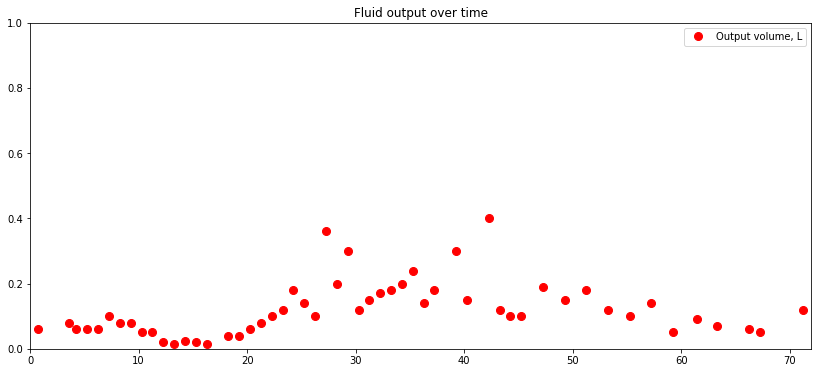

In [63]:
plt.figure(figsize=(14, 10))

plt.figure(figsize=(14, 6))
plt.title('Fluid output over time')

plt.plot(oe.HOURS, 
         oe.VALUE/1000, 
         'ro', markersize=8, label='Output volume, L')

plt.xlim(0,72)
plt.ylim(0,1)
plt.legend()


In [64]:
query = """
select de.icustay_id
  , (strftime('%s',de.starttime)-strftime('%s',ie.intime))/60.0/60.0 as HOURS_START
  , (strftime('%s',de.endtime)-strftime('%s',ie.intime))/60.0/60.0 as HOURS_END
  , de.linkorderid
  , di.label
  , de.amount
  , de.amountuom
  , de.rate
  , de.rateuom
from inputevents_mv de 
inner join icustays ie
  on de.icustay_id = ie.icustay_id
inner join d_items di
  on de.itemid = di.itemid
where de.subject_id = 40080
order by endtime;
"""

ie = pd.read_sql_query(query,conn)


In [65]:
ie.head()

,ICUSTAY_ID,HOURS_START,HOURS_END,LINKORDERID,LABEL,AMOUNT,AMOUNTUOM,RATE,RATEUOM
0,252522.0,3.270556,3.287222,279061,Lansoprazole (Prevacid),1.000000,dose,NaN,None
1,252522.0,3.270556,3.287222,5635057,Gastric Meds,30.000000,ml,NaN,None
2,252522.0,0.753889,5.253889,4337240,NaCl 0.9%,45.000001,ml,10.0,mL/hour
3,252522.0,7.270556,7.287222,775255,Free Water,300.000000,ml,NaN,None
4,252522.0,3.770556,9.770556,8221764,Nutren 2.0 (Full),60.000001,ml,10.0,mL/hour


In [66]:
ie['LABEL'].unique()

array(['Lansoprazole (Prevacid)', 'Gastric Meds', 'NaCl 0.9%',
       'Free Water', 'Nutren 2.0 (Full)', 'Furosemide (Lasix)',
       'Dextrose 5%', 'Norepinephrine', 'Insulin - Humalog', 'Metoprolol',
       'Metronidazole', 'PO Intake', 'GT Flush', 'Morphine Sulfate'],
      dtype=object)

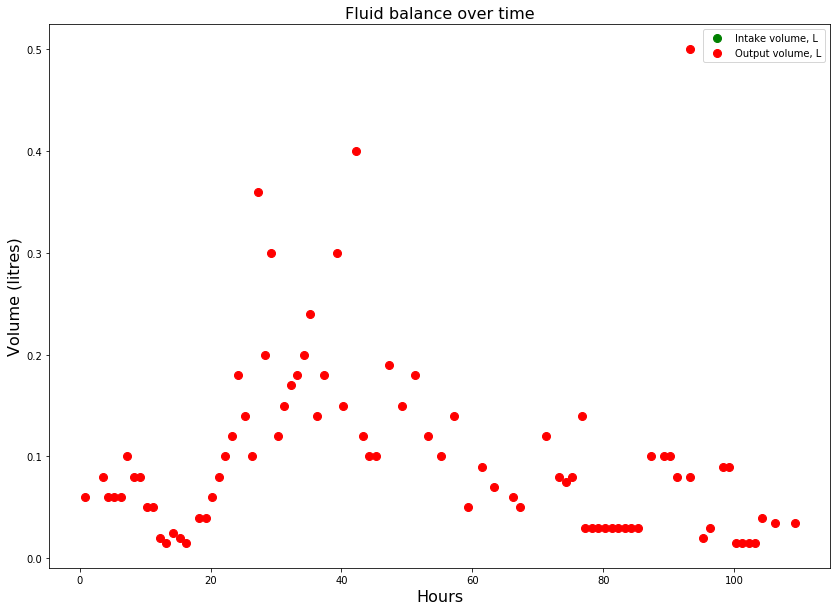

In [69]:
plt.figure(figsize=(14, 10))

# Plot the cumulative input against the cumulative output
plt.plot(ie.HOURS_END[ie.AMOUNTUOM=='mL'], 
         ie.AMOUNT[ie.AMOUNTUOM=='mL']/1000, 
         'go', markersize=8, label='Intake volume, L')

plt.plot(oe.HOURS, 
         oe.VALUE/1000, 
         'ro', markersize=8, label='Output volume, L')

plt.title('Fluid balance over time',fontsize=16)
plt.xlabel('Hours',fontsize=16)
plt.ylabel('Volume (litres)',fontsize=16)
# plt.ylim(0,38)
plt.legend()

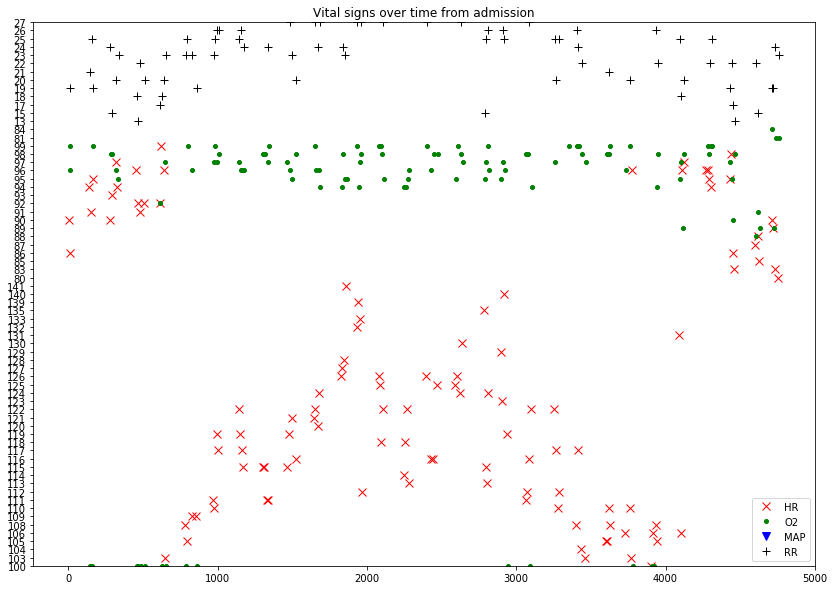

In [70]:
plt.figure(figsize=(14, 10))

plt.plot(ce.index[ce.LABEL=='Heart Rate'], 
         ce.VALUENUM[ce.LABEL=='Heart Rate'],
         'rx', markersize=8, label='HR')

plt.plot(ce.index[ce.LABEL=='O2 saturation pulseoxymetry'], 
         ce.VALUENUM[ce.LABEL=='O2 saturation pulseoxymetry'], 
         'g.', markersize=8, label='O2')

plt.plot(ce.index[ce.LABEL=='Arterial Blood Pressure mean'], 
         ce.VALUENUM[ce.LABEL=='Arterial Blood Pressure mean'], 
         'bv', markersize=8, label='MAP')

plt.plot(ce.index[ce.LABEL=='Respiratory Rate'], 
         ce.VALUENUM[ce.LABEL=='Respiratory Rate'], 
         'k+', markersize=8, label='RR')

plt.title('Vital signs over time from admission')
plt.ylim(0,130)
plt.legend()

In [72]:
# OPTION 1: load labevents data using the database connection
query = """
SELECT de.subject_id
  , de.charttime
  , di.label, de.value, de.valuenum
  , de.valueuom
FROM labevents de
INNER JOIN d_labitems di
  ON de.itemid = di.itemid
where de.subject_id = 40080
"""

le = pd.read_sql_query(query,conn)

# OPTION 2: load labevents from the CSV file
# le = pd.read_csv('data/example_labevents.csv', index_col='HOURSSINCEADMISSION')

In [74]:
# preview the labevents data
le.head

<bound method NDFrame.head of      SUBJECT_ID            CHARTTIME                            LABEL  VALUE  \
0         40080  2106-05-31 12:18:00   Alanine Aminotransferase (ALT)     10   
1         40080  2106-05-31 12:18:00                          Albumin    2.5   
2         40080  2106-05-31 12:18:00             Alkaline Phosphatase    126   
3         40080  2106-05-31 12:18:00                        Anion Gap     12   
4         40080  2106-05-31 12:18:00  Asparate Aminotransferase (AST)     28   
5         40080  2106-05-31 12:18:00                      Bicarbonate     31   
6         40080  2106-05-31 12:18:00                 Bilirubin, Total    0.4   
7         40080  2106-05-31 12:18:00                         Chloride    115   
8         40080  2106-05-31 12:18:00    Creatine Kinase, MB Isoenzyme      1   
9         40080  2106-05-31 12:18:00                       Creatinine    0.6   
10        40080  2106-05-31 12:18:00                          Glucose    180   
11        

In [76]:
# preview the ioevents data
le[le.LABEL=='Hemoglobin']

,SUBJECT_ID,CHARTTIME,LABEL,VALUE,VALUENUM,VALUEUOM
23,40080,2106-05-31 12:18:00,Hemoglobin,9.1,9.1,g/dL
76,40080,2106-06-01 02:38:00,Hemoglobin,8.3,8.3,g/dL
115,40080,2106-06-02 02:31:00,Hemoglobin,8.8,8.8,g/dL
146,40080,2106-06-03 02:36:00,Hemoglobin,8.2,8.2,g/dL
180,40080,2106-06-04 02:43:00,Hemoglobin,8.2,8.2,g/dL
214,40080,2106-06-05 03:57:00,Hemoglobin,8.5,8.5,g/dL


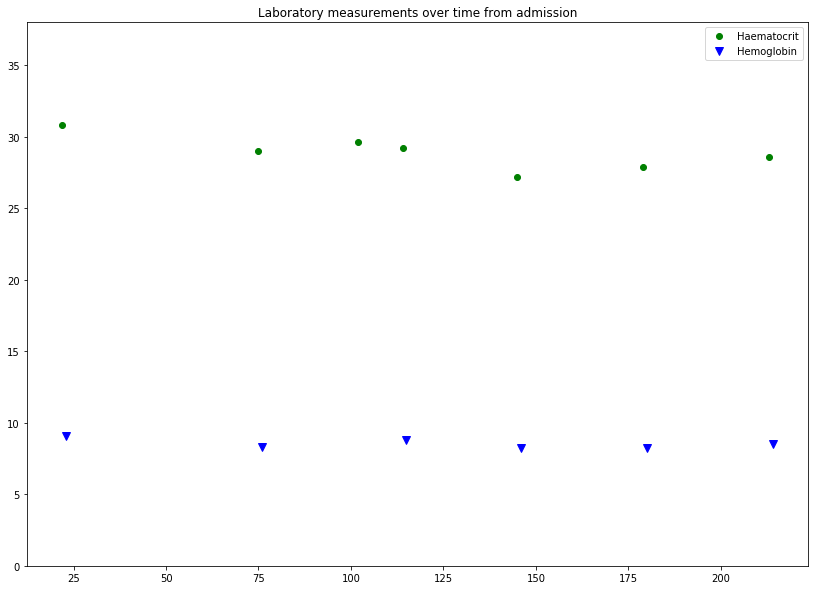

In [77]:
plt.figure(figsize=(14, 10))

plt.plot(le.index[le.LABEL=='Hematocrit'], 
         le.VALUENUM[le.LABEL=='Hematocrit'], 
         'go', markersize=6, label='Haematocrit')

plt.plot(le.index[le.LABEL=='Hemoglobin'], 
         le.VALUENUM[le.LABEL=='Hemoglobin'], 
         'bv', markersize=8, label='Hemoglobin')

plt.title('Laboratory measurements over time from admission')
plt.ylim(0,38)
plt.legend()

In [21]:
query = """
SELECT ICUSTAY_ID
  , (strftime('%s',CHARTTIME)-strftime('%s',STORETIME))/60.0/60.0 as HOURS
  , VALUE
  , VALUEUOM
FROM CHARTEVENTS
WHERE ICUSTAY_ID=252522;
"""

ce = pd.read_sql_query(query,conn)

In [22]:
ce.head()

,ICUSTAY_ID,HOURS,VALUE,VALUEUOM
0,252522,-0.450000,62,mmHg
1,252522,-0.033333,29,insp/min
2,252522,-0.033333,97,%
3,252522,-0.466667,119,bpm
4,252522,-0.483333,100,mmHg


In [27]:
icu_252522 = pd.read_sql("""
    SELECT *
        FROM CHARTEVENTS
        WHERE ICUSTAY_ID=252522
""",conn)

In [28]:
icu_252522.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,ITEMID,CHARTTIME,STORETIME,CGID,VALUE,VALUENUM,VALUEUOM,WARNING,ERROR,RESULTSTATUS,STOPPED
0,5254281,40080,162107,252522,220181,2106-06-02 01:00:00,2106-06-02 01:27:00,20871,62,62,mmHg,0,0,,
1,5254282,40080,162107,252522,220210,2106-06-02 01:00:00,2106-06-02 01:02:00,20871,29,29,insp/min,0,0,,
2,5254283,40080,162107,252522,220277,2106-06-02 01:00:00,2106-06-02 01:02:00,20871,97,97,%,0,0,,
3,5254284,40080,162107,252522,220045,2106-06-02 02:00:00,2106-06-02 02:28:00,20871,119,119,bpm,0,0,,
4,5254285,40080,162107,252522,220179,2106-06-02 02:00:00,2106-06-02 02:29:00,20871,100,100,mmHg,0,0,,


In [32]:
icu_252522

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,ITEMID,CHARTTIME,STORETIME,CGID,VALUE,VALUENUM,VALUEUOM,WARNING,ERROR,RESULTSTATUS,STOPPED
0,5254281,40080,162107,252522,220181,2106-06-02 01:00:00,2106-06-02 01:27:00,20871,62,62,mmHg,0,0,,
1,5254282,40080,162107,252522,220210,2106-06-02 01:00:00,2106-06-02 01:02:00,20871,29,29,insp/min,0,0,,
2,5254283,40080,162107,252522,220277,2106-06-02 01:00:00,2106-06-02 01:02:00,20871,97,97,%,0,0,,
3,5254284,40080,162107,252522,220045,2106-06-02 02:00:00,2106-06-02 02:28:00,20871,119,119,bpm,0,0,,
4,5254285,40080,162107,252522,220179,2106-06-02 02:00:00,2106-06-02 02:29:00,20871,100,100,mmHg,0,0,,
5,5254286,40080,162107,252522,220180,2106-06-02 02:00:00,2106-06-02 02:29:00,20871,59,59,mmHg,0,0,,
6,5254287,40080,162107,252522,220181,2106-06-02 02:00:00,2106-06-02 02:29:00,20871,70,70,mmHg,0,0,,
7,5254288,40080,162107,252522,220210,2106-06-02 02:00:00,2106-06-02 02:28:00,20871,27,27,insp/min,0,0,,
8,5254289,40080,162107,252522,220277,2106-06-02 02:00:00,2106-06-02 02:28:00,20871,96,96,%,0,0,,
9,5254290,40080,162107,252522,220045,2106-06-02 03:00:00,2106-06-02 03:04:00,20871,121,121,bpm,0,0,,


In [29]:
chart_pt_24 = pd.read_sql("""SELECT *
                            FROM chartevents
                            WHERE subject_id = 24
                            """, conn)

In [31]:
chart_pt_24

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,ITEMID,CHARTTIME,STORETIME,CGID,VALUE,VALUENUM,VALUEUOM,WARNING,ERROR,RESULTSTATUS,STOPPED
0,34355425,24,161859,262236,159,2139-06-06 13:30:00,2139-06-06 15:46:00,18424,,,,,,,NotStopd
1,34355426,24,161859,262236,161,2139-06-06 13:30:00,2139-06-06 15:46:00,18424,,,,,,,NotStopd
2,34355427,24,161859,262236,211,2139-06-06 13:30:00,2139-06-06 15:46:00,18424,,,BPM,,,,NotStopd
3,34355428,24,161859,262236,212,2139-06-06 13:30:00,2139-06-06 15:46:00,18424,,,,,,,NotStopd
4,34355429,24,161859,262236,618,2139-06-06 13:30:00,2139-06-06 15:46:00,18424,,,BPM,,,,NotStopd
5,34355430,24,161859,262236,646,2139-06-06 13:30:00,2139-06-06 15:46:00,18424,,,%,,,,NotStopd
6,34355431,24,161859,262236,742,2139-06-06 13:30:00,2139-06-06 15:46:00,18424,,,kg,,,,NotStopd
7,34355432,24,161859,262236,52,2139-06-06 15:30:00,2139-06-06 15:46:00,18424,109,109,mmHg,,,,NotStopd
8,34355433,24,161859,262236,70,2139-06-06 15:30:00,2139-06-06 15:48:00,18424,1.6423399448394775,1.6423399448394775,m2,,,,NotStopd
9,34355434,24,161859,262236,71,2139-06-06 15:30:00,2139-06-06 15:48:00,18424,1.9066599607467651,1.9066599607467651,m2,,,,NotStopd


In [80]:
admissions_df=pd.read_sql("""
    SELECT * FROM admissions
""",conn)

In [81]:
admissions_df.head()

,index,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
0,0,21,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,None,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,None,UNOBTAINABLE,MARRIED,WHITE,2196-04-09 10:06:00,2196-04-09 13:24:00,BENZODIAZEPINE OVERDOSE,0,1
1,1,22,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,None,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,None,CATHOLIC,MARRIED,WHITE,None,None,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0,1
2,2,23,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,None,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,None,None,BRAIN MASS,0,1
3,3,24,24,161859,2139-06-06 16:14:00,2139-06-09 12:48:00,None,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Private,None,PROTESTANT QUAKER,SINGLE,WHITE,None,None,INTERIOR MYOCARDIAL INFARCTION,0,1
4,4,25,25,129635,2160-11-02 02:06:00,2160-11-05 14:55:00,None,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,None,UNOBTAINABLE,MARRIED,WHITE,2160-11-02 01:01:00,2160-11-02 04:27:00,ACUTE CORONARY SYNDROME,0,1


In [85]:
admissions_df['DISCHTIME'] = pd.to_datetime(admissions_df['DISCHTIME'])
admissions_df['ADMITTIME'] = pd.to_datetime(admissions_df['ADMITTIME'])
admissions_df['length_stay'] = (admissions_df['DISCHTIME'] - admissions_df['ADMITTIME']).dt.days
admissions_length = admissions_df[['SUBJECT_ID','HADM_ID','ADMITTIME','DISCHTIME','length_stay','HOSPITAL_EXPIRE_FLAG']]
is_dead = admissions_df['HOSPITAL_EXPIRE_FLAG'] == 1

In [97]:
patient_dead = admissions_length[(admissions_length.length_stay > 5) & (admissions_length.length_stay < 10) & (admissions_length.HOSPITAL_EXPIRE_FLAG ==1)]
patient_alive = admissions_length[(admissions_length.length_stay > 5) & (admissions_length.length_stay < 10) & (admissions_length.HOSPITAL_EXPIRE_FLAG ==0)]

In [99]:
patient_dead
patient_dead.to_csv("/Users/ergangwang/Downloads/data_MIMIC/dead_patient.csv",index = None, header=True)

In [101]:
patient_dead.sample(20)

,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,length_stay,HOSPITAL_EXPIRE_FLAG
29477,25785,196076,2141-04-04 05:12:00,2141-04-10 17:40:00,6,1
19761,13301,183200,2198-02-28 19:05:00,2198-03-08 12:00:00,7,1
49902,64192,160781,2179-04-08 12:00:00,2179-04-16 21:00:00,8,1
51671,75626,151408,2127-01-13 19:02:00,2127-01-20 18:11:00,6,1
11082,8309,166581,2116-02-14 18:02:00,2116-02-24 17:34:00,9,1
609,884,165931,2167-06-09 05:57:00,2167-06-17 16:27:00,8,1
2989,2324,129210,2135-11-27 14:48:00,2135-12-04 12:00:00,6,1
14967,13965,184273,2121-10-09 19:22:00,2121-10-16 09:41:00,6,1
52885,75856,122406,2123-09-22 18:24:00,2123-10-02 11:00:00,9,1
52537,79425,150548,2167-03-10 02:56:00,2167-03-19 20:05:00,9,1


In [110]:
#subject_id_list = [25785,13301,64192,75626,8309,884,2324,13965,75856,79425,31730,7519,17905,94828,83752,60659,495,92475,14182,47912]
subject_id_list = [75626,8309,884,2324,13965,75856,79425,31730,7519,17905,94828,83752,60659,495,92475,14182,47912]
for x in subject_id_list:
    query_string="SELECT * FROM chartevents WHERE subject_id="
    query_string=query_string + str(x)
    print(query_string)
    temp_df = pd.read_sql(query_string,conn)
    out_path="/Users/ergangwang/Downloads/data_MIMIC/dead_patient_" + str(x) + ".csv"
    print (out_path)
    temp_df.to_csv(out_path,index=None, header=True)
# chart_pt_24 = pd.read_sql("""SELECT *
#                             FROM chartevents
#                             WHERE subject_id = 24
#                             """, conn)
# chart_pt_24.to_csv("...",index=None, header=True)

SELECT * FROM chartevents WHERE subject_id=75626
/Users/ergangwang/Downloads/data_MIMIC/dead_patient_75626.csv
SELECT * FROM chartevents WHERE subject_id=8309
/Users/ergangwang/Downloads/data_MIMIC/dead_patient_8309.csv
SELECT * FROM chartevents WHERE subject_id=884
/Users/ergangwang/Downloads/data_MIMIC/dead_patient_884.csv
SELECT * FROM chartevents WHERE subject_id=2324
/Users/ergangwang/Downloads/data_MIMIC/dead_patient_2324.csv
SELECT * FROM chartevents WHERE subject_id=13965
/Users/ergangwang/Downloads/data_MIMIC/dead_patient_13965.csv
SELECT * FROM chartevents WHERE subject_id=75856
/Users/ergangwang/Downloads/data_MIMIC/dead_patient_75856.csv
SELECT * FROM chartevents WHERE subject_id=79425
/Users/ergangwang/Downloads/data_MIMIC/dead_patient_79425.csv
SELECT * FROM chartevents WHERE subject_id=31730
/Users/ergangwang/Downloads/data_MIMIC/dead_patient_31730.csv
SELECT * FROM chartevents WHERE subject_id=7519
/Users/ergangwang/Downloads/data_MIMIC/dead_patient_7519.csv
SELECT * FR

In [100]:
patient_alive
patient_alive.to_csv("/Users/ergangwang/Downloads/data_MIMIC/alive_patient.csv",index = None, header=True)

In [102]:
patient_alive.sample(20)

,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,length_stay,HOSPITAL_EXPIRE_FLAG
3512,3057,192441,2112-09-01 19:16:00,2112-09-11 16:10:00,9,0
35551,29665,175645,2129-03-30 03:29:00,2129-04-06 14:30:00,7,0
35918,28572,144424,2109-07-06 14:00:00,2109-07-15 16:25:00,9,0
55021,84071,160709,2159-08-02 11:30:00,2159-08-08 13:40:00,6,0
17216,14405,124326,2133-09-02 15:19:00,2133-09-09 16:58:00,7,0
37344,40788,105348,2155-10-21 23:07:00,2155-10-30 12:08:00,8,0
39901,42071,186278,2117-08-05 11:09:00,2117-08-14 14:37:00,9,0
34682,29191,174377,2142-08-05 14:25:00,2142-08-13 16:20:00,8,0
11436,9486,128770,2155-08-19 19:02:00,2155-08-26 14:00:00,6,0
16229,10677,154543,2152-05-07 17:04:00,2152-05-15 16:24:00,7,0
